<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/TimeSeriesAnalysis_Forecasting_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis - Forecasting with LSTM

Long Short Term Memory

In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Electric_Production.csv',parse_dates=True,index_col='DATE')
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
#Get train and Test data

train=df.iloc[:250,:]
test=df.iloc[250:,:]

In [ ]:
#for better performance of sequential model and to reduce computing, scale data
scaler=StandardScaler()
sctrain=scaler.fit_transform(train)
sctest=scaler.fit_transform(test)

Define function to get training data

    train.shape = (p,q)



In [ ]:
def featureTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  x,y=np.array(x),np.array(y)
  return x,y

In [ ]:
n_steps=8

xtrain,ytrain=featureTransform(n_steps,sctrain)

xtrain.shape,ytrain.shape

((242, 8), (242,))

Reshape training data into 3D

    train.reshape(p,q,1)

In [ ]:
#Reshape training data in acceptable to LSTM model

xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

Build model and fit

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
from keras import Sequential

#build model
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(xtrain,ytrain,epochs=100,batch_size=20,verbose=0)

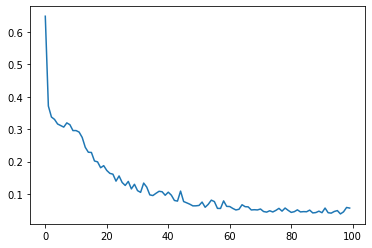

In [ ]:
plt.plot(history.history['loss'])

Get testing data and predictions

In [ ]:
xtest,ytest=featureTransform(12,sctest)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [ ]:
ypred=model.predict(xtest)
predictions=scaler.inverse_transform(ypred)

In [ ]:
actual=scaler.inverse_transform(ytest.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

797.1410652247354
28.233686709757468


#Time Series Analysis - Forecasting with GRU Neural Network

data - electricity data

In [ ]:
from keras.layers import GRU
from keras.layers import Dense
from keras import Sequential

#build model
model=Sequential()
model.add(GRU(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(xtrain,ytrain,epochs=100,batch_size=30,verbose=0)

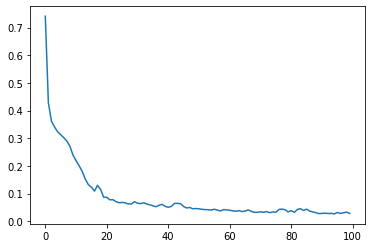

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
ypred=model.predict(xtest)
predictions=scaler.inverse_transform(ypred)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

35.87587712809831
5.989647496146857
